# Introduction

### How we define the "best" neiborhood
* We define the best neighborhood as the one that will be the safest long term. We then looked at safety in 3 different ways. The first way is as the safety of your investment, you want to buy a house somewhere where your home's value will increase. The second area of safety is crime. you want to live somewhere where you don't have to worry about crime. Lastly we looked for neighborhoods where people lived the longest, as this is a general signal that the people there are in good health.

### Our Metrics
* `Property Values`: Property values were chosen as one of our metrics because you want to go into a neiborhood that shows signs of growth. For example if you found a good deal on a house but the property values in that neiborhood were decreasing, you wouldnt want to live there. In contrast you would want to live in a fast growing neiborhood where your purchase of a home will be the best investment.
* `Crime rate`: Crime rate is one of our metrics because, in our opinion, a safe neighborhood is a better  neighborhood. By finding the neighborhoods with the lowest crime we will also find the safest neighborhood
* `Median age of death`: This data can reflect many things, such as the crime rate, murders can lower the median death rate, also, this median age of death rate means there are less people who die in accidents.

# Luke Gabel - Property Values

In [6]:
#import the required modules
import pandas as pd
import numpy as np
%matplotlib inline
import datetime

#import the data
data = pd.read_csv("Luke_dataset.csv")

#remove data that doesnt meet certian criteria
data = data[data['PROPERTYCITY'] == "PITTSBURGH"] 
data = data[data['SALEPRICE'] >= 10000] 
data = data[data['NEIGHDESC'] != ""] 
data = data[data['SALEDATE'] != ""] 


data.sample(5)

PROPERTYCITY PROPERTYSTATE NEIGHCODE  \
579258   PITTSBURGH            PA     82702   
151100   PITTSBURGH            PA     81301   
245440   PITTSBURGH            PA     56C44   
32369    PITTSBURGH            PA     11202   
380670   PITTSBURGH            PA     93102   

                                      NEIGHDESC    SALEDATE  SALEPRICE  \
579258                                    82702  10-14-2016    37000.0   
151100                   CASTLE SHANNON BOROUGH  02-19-2003    20000.0   
245440  SUBURBAN (SOUTH AND WEST OF PITTSBURGH)  11-20-2006   613000.0   
32369                                     11202  03-21-1983    17000.0   
380670                                    93102  07-03-1995   159000.0   

        NEIGHBORHOOD  
579258           NaN  
151100           NaN  
245440           NaN  
32369            NaN  
380670           NaN

In [7]:
#convert date formats and get rid of more unnessecary data
def convert_to_year(dstr):
    return datetime.date(int(dstr.split("-")[2]), int(dstr.split("-")[0]), int(dstr.split("-")[1]))
def fix_desc(dstr):
    if(str(dstr).isdigit()):
        return "INVALID"
    return dstr
timeData = data
timeData['SALEDATE'] = timeData['SALEDATE'].apply(convert_to_year)
timeData['NEIGHDESC'] = timeData['NEIGHDESC'].apply(fix_desc)
timeData = timeData[timeData['NEIGHDESC'] != "INVALID"]

#define the dates that will be used as the bounds
cutoff1 = datetime.date(2010, 1, 1)
cutoff2 = datetime.date(2015, 1, 1)
cutoff3 = datetime.date(2020, 1, 1)

#split the list into a the before and after
data_old = timeData[timeData['SALEDATE'] >= cutoff1]
data_old = data_old[data_old['SALEDATE'] < cutoff2] 
values_old = data_old.groupby("NEIGHDESC")["SALEPRICE"].mean()
#values_old = values_old.sort_values()

data_new = timeData[timeData['SALEDATE'] >= cutoff2]
data_new = data_new[data_new['SALEDATE'] <= cutoff3]
values_new = data_new.groupby("NEIGHDESC")["SALEPRICE"].mean()
#values_new = values_new.sort_values()

In [10]:
#display a small smaple of the older value data
data_old.sample(5)

PROPERTYCITY PROPERTYSTATE NEIGHCODE                        NEIGHDESC  \
455324   PITTSBURGH            PA     95004         UPPER ST. CLAIR TOWNSHIP   
89491    PITTSBURGH            PA     12403  WARD 24 - SPRING HILL-CITY VIEW   
487060   PITTSBURGH            PA     95304                 WILKINS TOWNSHIP   
401655   PITTSBURGH            PA     93401              PENN HILLS TOWNSHIP   
354270   PITTSBURGH            PA     92606           MOUNT LEBANON TOWNSHIP   

          SALEDATE  SALEPRICE  NEIGHBORHOOD  
455324  2014-04-23   174900.0           NaN  
89491   2014-06-24    13000.0           NaN  
487060  2013-12-23   100000.0           NaN  
401655  2012-04-23    55000.0           NaN  
354270  2011-08-31   122000.0           NaN

In [11]:
#display a small sample of the newer value data
data_new.sample(5)

PROPERTYCITY PROPERTYSTATE NEIGHCODE                 NEIGHDESC  \
262548   PITTSBURGH            PA     61S30   VILLAGE OF BRECKENRIDGE   
412346   PITTSBURGH            PA     93403       PENN HILLS TOWNSHIP   
291794   PITTSBURGH            PA     88001              PLUM BOROUGH   
500012   PITTSBURGH            PA     95002  UPPER ST. CLAIR TOWNSHIP   
364746   PITTSBURGH            PA     92601    MOUNT LEBANON TOWNSHIP   

          SALEDATE  SALEPRICE  NEIGHBORHOOD  
262548  2017-08-26   205000.0           NaN  
412346  2018-10-25   129000.0           NaN  
291794  2019-09-20    59900.0           NaN  
500012  2016-09-10   257000.0           NaN  
364746  2015-05-13   685000.0           NaN

NEIGHDESC
IMPERIAL HOLDE                     8.674924e+04
SHADE EAST                         9.805000e+04
PENNHOUSE & GATEWAY TOWER          9.915961e+04
HIGHLAND COMMONS                   1.009473e+05
151 FIRST                          1.021663e+05
THE REGENCY                        1.033796e+05
SKYLINE &WINDOM HILL               1.224333e+05
4 COMPLEXES                        1.236252e+05
THE LOFTS                          1.256116e+05
1000 GRANDVIEW                     1.331662e+05
BEACON STREET                      1.382781e+05
FIRST AVENUE                       1.486667e+05
WARD 24 - TROY HILL                1.558835e+05
SHADYSIDE                          1.559814e+05
VILLAGE AT SHADYSIDE               1.595155e+05
BELLEFIELD                         1.779387e+05
STRIP LOFT                         1.877732e+05
POST WAR MUNI 107                  1.898065e+05
BEN AVON HEIGHTS                   2.195776e+05
WARD 22 - NORTH SHORE/ALLEGHENY    2.274137e+05
PIATT PLACE                   

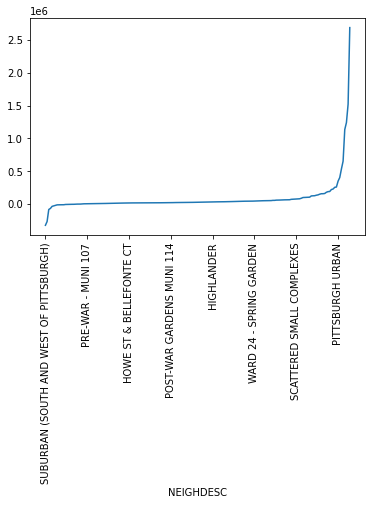

In [13]:
#calculate the list of how the property values have changed and get the highest ones
values_change = values_new-values_old
#get rid of enpty data
values_change = values_change.dropna()
#display that data in a chart
values_change.sort_values().plot(kind='line',rot=90)
print(values_change.sort_values().tail(30))

# Andrew Potter

In [2]:
import pandas as pd
import numpy as np

data=pd.read_csv("arrests.csv")
data.head()

PK       CCR   AGE GENDER RACE           ARRESTTIME  \
0  1975272  16158872  42.0      F    B  2016-08-24T12:20:00   
1  1974456  16144120  31.0      M    W  2016-08-03T14:55:00   
2  1974466  16144165  63.0      F    B  2016-08-03T16:45:00   
3  1974550  16145257  25.0      F    W  2016-08-05T02:36:00   
4  1974596  16145962  25.0      M    B  2016-08-06T02:00:00   

                                     ARRESTLOCATION  \
0         4700 Block Centre AV Pittsburgh, PA 15213   
1  4200 Block Steubenville PKE Pittsburgh, PA 15205   
2        900 Block Freeport RD Fox Chapel, PA 15238   
3       Foreland ST & Cedar AV Pittsburgh, PA 15212   
4         900 Block Woodlow ST Pittsburgh, PA 15205   

                                            OFFENSES  \
0                                 3929 Retail Theft.   
1       13(a)(16) Possession of Controlled Substance   
2                                 3929 Retail Theft.   
3  5503 Disorderly Conduct. / 5505 Public Drunken...   
4  2702 Aggravated Assault. / 2705 Recklessy Enda...   

                                   INCIDENTLOCATION INCIDENTNEIGHBORHOOD  \
0         4700 Block Centre AV Pittsburgh, PA 15213           Bloomfield   
1  4200 Block Steubenville PKE Pittsburgh, PA 15205         Outside City   
2        900 Block Freeport RD Fox Chapel, PA 15238             Westwood   
3       Foreland ST & Cedar AV Pittsburgh, PA 15212       East Allegheny   
4         900 Block Woodlow ST Pittsburgh, PA 15205      Crafton Heights   

  INCIDENTZONE  INCIDENTTRACT  COUNCIL_DISTRICT  PUBLIC_WORKS_DIVISION  \
0            5          804.0               8.0                    2.0   
1          OSC         5599.0               NaN                    NaN   
2            5         2811.0               9.0                    2.0   
3            1         2304.0               1.0                    1.0   
4            5         2814.0               2.0                    5.0   

           X          Y  
0 -79.949277  40.452551  
1 -80.088018  40.440136  
2 -79.891803  40.486625  
3 -80.001939  40.454080  
4 -80.052204  40.445900

In [4]:
#Sorted arrest data by neighborhood
data1=data['INCIDENTNEIGHBORHOOD'].value_counts()
#Showing bottom 30 neighborhoods which have the least arrest data
data1.tail(30)

Morningside                25
California-Kirkbride       25
Central Northside          23
Mount Oliver               22
Friendship                 22
Bon Air                    22
Esplen                     21
Polish Hill                19
Fairywood                  17
Squirrel Hill North        17
Lincoln Place              17
Glen Hazel                 16
Arlington Heights          16
Windgap                    16
Duquesne Heights           15
Hays                       14
Allegheny West             13
Outside County             13
Summer Hill                10
Regent Square               9
Oakwood                     8
East Carnegie               8
Troy Hill-Herrs Island      6
Outside State               5
St. Clair                   5
Chartiers City              5
Ridgemont                   4
Swisshelm Park              3
New Homestead               3
Mt. Oliver Neighborhood     2
Name: INCIDENTNEIGHBORHOOD, dtype: int64

# Junyao Jiang

In [5]:
import pandas as pd
import numpy as np

medianAge = pd.read_csv("https://data.wprdc.org/dataset/ee735209-4de7-4ea4-b446-bf0f0f6d9cb3/resource/c2e1500a-a12a-4e91-be94-76c6a892b7e2/download/nhoodmedianage20112015.csv",
                           index_col="NEIGHBORHOOD", 
                           parse_dates=True)

medianAge.head()

BLACKdeaths  Black MD AGE AT DEATH  WHITEdeaths  \
NEIGHBORHOOD                                                      
SOUTH SHORE             0.0                    0.0          0.0   
CHATEAU                 0.0                    0.0          2.0   
NORTH SHORE             0.0                    0.0          4.0   
ALLEGHENY WEST          3.0                    NaN          4.0   
SAINT CLAIR             5.0                   67.5          5.0   

                White MD AGE AT DEATH  TOTALdeaths*  TOTAL MD AGE AT DEATH  
NEIGHBORHOOD                                                                
SOUTH SHORE                       0.0           0.0                    0.0  
CHATEAU                           NaN           2.0                    NaN  
NORTH SHORE                       NaN           5.0                   80.0  
ALLEGHENY WEST                    NaN           8.0                   65.0  
SAINT CLAIR                      67.5          10.0                   67.5

In [6]:
medianAge1 = medianAge['TOTAL MD AGE AT DEATH']
medianAge1

NEIGHBORHOOD
SOUTH SHORE                                 0.0
CHATEAU                                     NaN
NORTH SHORE                                80.0
ALLEGHENY WEST                             65.0
SAINT CLAIR                                67.5
                                           ... 
CARRICK                                    75.9
BROOKLINE                                  77.8
SQUIRREL HILL SOUTH                        85.9
NaN                                         NaN
*Total includes Other and Unknown race.     NaN
Name: TOTAL MD AGE AT DEATH, Length: 92, dtype: float64

In [7]:
medianAge.sort_values(by='TOTAL MD AGE AT DEATH', ascending=False).head(10)

BLACKdeaths  Black MD AGE AT DEATH  WHITEdeaths  \
NEIGHBORHOOD                                                           
SQUIRREL HILL SOUTH         58.0                   83.2        721.0   
NORTH OAKLAND               45.0                   70.9        227.0   
BANKSVILLE                   4.0                    NaN        247.0   
POINT BREEZE                13.0                   66.7        158.0   
SQUIRREL HILL NORTH          6.0                   75.0        231.0   
CENTRAL OAKLAND              2.0                    NaN         50.0   
NEW HOMESTEAD                4.0                    NaN         67.0   
SWISSHELM PARK               0.0                    0.0         67.0   
OVERBROOK                    4.0                    NaN        284.0   
SHADYSIDE                   72.0                   81.2        320.0   

                     White MD AGE AT DEATH  TOTALdeaths*  \
NEIGHBORHOOD                                               
SQUIRREL HILL SOUTH                   86.2         802.0   
NORTH OAKLAND                         86.8         279.0   
BANKSVILLE                            85.5         253.0   
POINT BREEZE                          85.7         175.0   
SQUIRREL HILL NORTH                   85.3         242.0   
CENTRAL OAKLAND                       84.0          52.0   
NEW HOMESTEAD                         83.8          71.0   
SWISSHELM PARK                        83.1          67.0   
OVERBROOK                             82.5         289.0   
SHADYSIDE                             82.4         406.0   

                     TOTAL MD AGE AT DEATH  
NEIGHBORHOOD                                
SQUIRREL HILL SOUTH                   85.9  
NORTH OAKLAND                         85.6  
BANKSVILLE                            85.5  
POINT BREEZE                          85.1  
SQUIRREL HILL NORTH                   85.0  
CENTRAL OAKLAND                       84.0  
NEW HOMESTEAD                         83.4  
SWISSHELM PARK                        83.1  
OVERBROOK                             82.2  
SHADYSIDE                             82.1

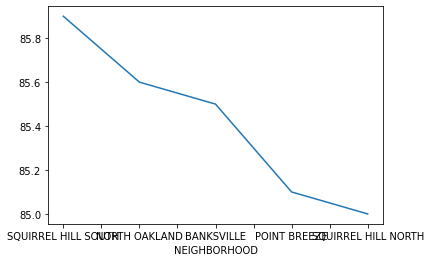

In [8]:
medianAge1.sort_values(ascending=False).head(5).plot()

# Comparison

To find the best neighborhood we looked at the individual lists of best neighborhoods from each metric and tried to find common ones. Given how different each of our datasets was it was difficult to find one neighborhood that ranked highly in every category, so we had to make some compromises. Our final decision was St. Clair. St. Clair ranked highly in the values and crime categories, and while it was more moderate in the life category it was the best we could determine between the 3 datasets we chose.